import pandas as pd
import numpy as np
get_ipython().magic(u'matplotlib inline')
import seaborn as sns
import matplotlib.pyplot as plt
import os
import scipy
from sklearn.preprocessing import LabelEncoder
from scipy.sparse import csr_matrix, hstack
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import StratifiedKFold
from sklearn.metrics import log_loss

In [3]:
datadir = '/Users/Derick/Desktop/talkingdata'
gatrain = pd.read_csv(os.path.join(datadir,'gender_age_train.csv'),index_col='device_id')
gatest = pd.read_csv(os.path.join(datadir,'gender_age_test.csv'),index_col = 'device_id')
phone = pd.read_csv(os.path.join(datadir,'phone_brand_device_model.csv'))
phone = phone.drop_duplicates('device_id',keep='first').set_index('device_id')
events = pd.read_csv(os.path.join(datadir,'events.csv'),
                     parse_dates=['timestamp'], index_col='event_id')
appevents = pd.read_csv(os.path.join(datadir,'app_events.csv'), 
                        usecols=['event_id','app_id','is_active'],dtype={'is_active':bool})
applabels = pd.read_csv(os.path.join(datadir,'app_labels.csv'))

In [2]:
import pandas as pd
import numpy as np
get_ipython().magic(u'matplotlib inline')
import seaborn as sns
import matplotlib.pyplot as plt
import os
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
from scipy.sparse import csr_matrix, hstack
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import StratifiedKFold
from sklearn.metrics import log_loss
from sklearn.neural_network import MLPClassifier
from geopy.geocoders import Nominatim

ImportError: cannot import name 'MLPClassifier'

In [4]:
phone.head(5)

,phone_brand,device_model
device_id,,
-8890648629457979026,小米,红米
1277779817574759137,小米,MI 2
5137427614288105724,三星,Galaxy S4
3669464369358936369,SUGAR,时尚手机
-5019277647504317457,三星,Galaxy Note 2


In [5]:
events.head(5)

,device_id,timestamp,longitude,latitude
event_id,,,,
1,29182687948017175,2016-05-01 00:55:25,121.38,31.24
2,-6401643145415154744,2016-05-01 00:54:12,103.65,30.97
3,-4833982096941402721,2016-05-01 00:08:05,106.60,29.70
4,-6815121365017318426,2016-05-01 00:06:40,104.27,23.28
5,-5373797595892518570,2016-05-01 00:07:18,115.88,28.66


In [6]:
appevents.head(5)

,event_id,app_id,is_active
0,2,5927333115845830913,True
1,2,-5720078949152207372,False
2,2,-1633887856876571208,False
3,2,-653184325010919369,True
4,2,8693964245073640147,True


In [7]:
applabels.head(5)

,app_id,label_id
0,7324884708820027918,251
1,-4494216993218550286,251
2,6058196446775239644,406
3,6058196446775239644,407
4,8694625920731541625,406


In [8]:
gatrain['trainrow'] = np.arange(gatrain.shape[0])

In [9]:
gatest['testrow'] = np.arange(gatest.shape[0])

In [10]:
brandencoder = LabelEncoder().fit(phone.phone_brand)
phone['brand'] = brandencoder.transform(phone['phone_brand'])
gatrain['brand'] = phone['brand']
gatest['brand'] = phone['brand']
Xtr_brand = csr_matrix((np.ones(gatrain.shape[0]), 
                       (gatrain.trainrow, gatrain.brand)))
Xte_brand = csr_matrix((np.ones(gatest.shape[0]), 
                       (gatest.testrow, gatest.brand)))
print('Brand features: train shape {}, test shape {}'.format(Xtr_brand.shape, Xte_brand.shape))



Brand features: train shape (74645, 131), test shape (112071, 131)


In [11]:
print(Xte_brand)

  (0, 51)	1.0
  (1, 51)	1.0
  (2, 31)	1.0
  (3, 31)	1.0
  (4, 51)	1.0
  (5, 51)	1.0
  (6, 51)	1.0
  (7, 51)	1.0
  (8, 15)	1.0
  (9, 15)	1.0
  (10, 128)	1.0
  (11, 51)	1.0
  (12, 15)	1.0
  (13, 31)	1.0
  (14, 15)	1.0
  (15, 31)	1.0
  (16, 31)	1.0
  (17, 31)	1.0
  (18, 15)	1.0
  (19, 15)	1.0
  (20, 51)	1.0
  (21, 51)	1.0
  (22, 15)	1.0
  (23, 31)	1.0
  (24, 13)	1.0
  :	:
  (112046, 15)	1.0
  (112047, 51)	1.0
  (112048, 31)	1.0
  (112049, 18)	1.0
  (112050, 101)	1.0
  (112051, 101)	1.0
  (112052, 31)	1.0
  (112053, 31)	1.0
  (112054, 117)	1.0
  (112055, 15)	1.0
  (112056, 31)	1.0
  (112057, 51)	1.0
  (112058, 51)	1.0
  (112059, 101)	1.0
  (112060, 13)	1.0
  (112061, 13)	1.0
  (112062, 15)	1.0
  (112063, 31)	1.0
  (112064, 31)	1.0
  (112065, 15)	1.0
  (112066, 2)	1.0
  (112067, 51)	1.0
  (112068, 121)	1.0
  (112069, 121)	1.0
  (112070, 51)	1.0


In [12]:
gatest.shape

(112071, 2)

In [13]:
print(Xtr_brand)

  (0, 51)	1.0
  (1, 51)	1.0
  (2, 51)	1.0
  (3, 51)	1.0
  (4, 51)	1.0
  (5, 7)	1.0
  (6, 117)	1.0
  (7, 51)	1.0
  (8, 13)	1.0
  (9, 15)	1.0
  (10, 31)	1.0
  (11, 31)	1.0
  (12, 15)	1.0
  (13, 31)	1.0
  (14, 103)	1.0
  (15, 31)	1.0
  (16, 51)	1.0
  (17, 51)	1.0
  (18, 128)	1.0
  (19, 51)	1.0
  (20, 15)	1.0
  (21, 51)	1.0
  (22, 31)	1.0
  (23, 15)	1.0
  (24, 51)	1.0
  :	:
  (74620, 117)	1.0
  (74621, 117)	1.0
  (74622, 31)	1.0
  (74623, 51)	1.0
  (74624, 117)	1.0
  (74625, 31)	1.0
  (74626, 31)	1.0
  (74627, 31)	1.0
  (74628, 51)	1.0
  (74629, 51)	1.0
  (74630, 15)	1.0
  (74631, 18)	1.0
  (74632, 51)	1.0
  (74633, 51)	1.0
  (74634, 51)	1.0
  (74635, 101)	1.0
  (74636, 10)	1.0
  (74637, 10)	1.0
  (74638, 51)	1.0
  (74639, 15)	1.0
  (74640, 51)	1.0
  (74641, 51)	1.0
  (74642, 51)	1.0
  (74643, 31)	1.0
  (74644, 51)	1.0


In [14]:
m = phone.phone_brand.str.cat(phone.device_model)
modelencoder = LabelEncoder().fit(m)
phone['model'] = modelencoder.transform(m)
gatrain['model'] = phone['model']
gatest['model'] = phone['model']
Xtr_model = csr_matrix((np.ones(gatrain.shape[0]), 
                       (gatrain.trainrow, gatrain.model)))
Xte_model = csr_matrix((np.ones(gatest.shape[0]), 
                       (gatest.testrow, gatest.model)))
print('Model features: train shape {}, test shape {}'.format(Xtr_model.shape, Xte_model.shape))



Model features: train shape (74645, 1667), test shape (112071, 1667)


In [15]:
appencoder = LabelEncoder().fit(appevents.app_id)
appevents['app'] = appencoder.transform(appevents.app_id)
napps = len(appencoder.classes_)
deviceapps = (appevents.merge(events[['device_id']], how='left',left_on='event_id',right_index=True)
                       .groupby(['device_id','app'])['app'].agg(['size'])
                       .merge(gatrain[['trainrow']], how='left', left_index=True, right_index=True)
                       .merge(gatest[['testrow']], how='left', left_index=True, right_index=True)
                       .reset_index())
deviceapps.head()

,device_id,app,size,trainrow,testrow
0,-9222956879900151005,548,18,21594.0,NaN
1,-9222956879900151005,1096,18,21594.0,NaN
2,-9222956879900151005,1248,26,21594.0,NaN
3,-9222956879900151005,1545,12,21594.0,NaN
4,-9222956879900151005,1664,18,21594.0,NaN


In [16]:
d = deviceapps.dropna(subset=['trainrow'])
Xtr_app = csr_matrix((np.array(d['size']), (d.trainrow, d.app)), 
                      shape=(gatrain.shape[0],napps))
d = deviceapps.dropna(subset=['testrow'])
Xte_app = csr_matrix((np.array(d['size']), (d.testrow, d.app)), 
                      shape=(gatest.shape[0],napps))
print('Size data: train shape {}, test shape {}'.format(Xtr_app.shape, Xte_app.shape))




Size data: train shape (74645, 19237), test shape (112071, 19237)


In [17]:
print(Xtr_app[21594,548])

18


In [18]:
appencoder = LabelEncoder().fit(appevents.app_id)
appevents['app'] = appencoder.transform(appevents.app_id)
napps = len(appencoder.classes_)
activemean= (appevents.merge(events[['device_id']], how='left',left_on='event_id',right_index=True)
                       .groupby(['device_id','app'])['is_active'].mean().to_frame()
                       .merge(gatrain[['trainrow']], how='left', left_index=True, right_index=True)
                       .merge(gatest[['testrow']], how='left', left_index=True, right_index=True)
                       .reset_index())
activemean.head()

,device_id,app,is_active,trainrow,testrow
0,-9222956879900151005,548,0.222222,21594.0,NaN
1,-9222956879900151005,1096,0.000000,21594.0,NaN
2,-9222956879900151005,1248,0.576923,21594.0,NaN
3,-9222956879900151005,1545,0.166667,21594.0,NaN
4,-9222956879900151005,1664,0.000000,21594.0,NaN


In [19]:
d = activemean.dropna(subset=['trainrow'])
Xtr_active = csr_matrix((np.ones(d.shape[0]), (d.trainrow, d.app)), 
                      shape=(gatrain.shape[0],napps))
d = activemean.dropna(subset=['testrow'])
Xte_active = csr_matrix((np.ones(d.shape[0]), (d.testrow, d.app)), 
                      shape=(gatest.shape[0],napps))
print('active data: train shape {}, test shape {}'.format(Xtr_active.shape, Xte_active.shape))



active data: train shape (74645, 19237), test shape (112071, 19237)


In [20]:
applabels = applabels.loc[applabels.app_id.isin(appevents.app_id.unique())]
applabels['app'] = appencoder.transform(applabels.app_id)
labelencoder = LabelEncoder().fit(applabels.label_id)
applabels['label'] = labelencoder.transform(applabels.label_id)
nlabels = len(labelencoder.classes_)



In [21]:
devicelabels = (deviceapps[['device_id','app']]
                .merge(applabels[['app','label']])
                .groupby(['device_id','label'])['app'].agg(['size'])
                .merge(gatrain[['trainrow']], how='left', left_index=True, right_index=True)
                .merge(gatest[['testrow']], how='left', left_index=True, right_index=True)
                .reset_index())
devicelabels.head()

,device_id,label,size,trainrow,testrow
0,-9222956879900151005,117,1,21594.0,NaN
1,-9222956879900151005,120,1,21594.0,NaN
2,-9222956879900151005,126,1,21594.0,NaN
3,-9222956879900151005,138,2,21594.0,NaN
4,-9222956879900151005,147,2,21594.0,NaN


In [22]:
d = devicelabels.dropna(subset=['trainrow'])
Xtr_label = csr_matrix((np.ones(d.shape[0]), (d.trainrow, d.label)), 
                      shape=(gatrain.shape[0],nlabels))
d = devicelabels.dropna(subset=['testrow'])
Xte_label = csr_matrix((np.ones(d.shape[0]), (d.testrow, d.label)), 
                      shape=(gatest.shape[0],nlabels))
print('Labels data: train shape {}, test shape {}'.format(Xtr_label.shape, Xte_label.shape))



Labels data: train shape (74645, 492), test shape (112071, 492)


In [23]:
# active_time

a = pd.DataFrame(events['timestamp'],index = (events['timestamp']))
hour = a.index.hour
events['timeitv'] = hour // np.linspace(3,3,events.shape[0])

In [ ]:
m = events[['device_id','timeitv']].groupby(['device_id','timeitv']).size().to_frame()


In [ ]:
for device in events[['device_id','timeitv']].groupby(['device_id','timeitv']):
    print()

In [ ]:
Xtrain = hstack((Xtr_brand, Xtr_model, Xtr_active, Xtr_label), format='csr')
Xtest =  hstack((Xte_brand, Xte_model, Xte_active, Xte_label), format='csr')
print('All features: train shape {}, test shape {}'.format(Xtrain.shape, Xtest.shape))

In [ ]:
targetencoder = LabelEncoder().fit(gatrain.group)
y = targetencoder.transform(gatrain.group)
nclasses = len(targetencoder.classes_)

In [148]:
def score(clf, random_state = 0):
    kf = StratifiedKFold(y, n_folds=5, shuffle=True, random_state=random_state)
    pred = np.zeros((y.shape[0],nclasses))
    for itrain, itest in kf:
        Xtr, Xte = Xtrain[itrain, :], Xtrain[itest, :]
        ytr, yte = y[itrain], y[itest]
        clf.fit(Xtr, ytr)
        pred[itest,:] = clf.predict_proba(Xte)
        # Downsize to one fold only for kernels
        return log_loss(yte, pred[itest, :])
        print("{:.5f}".format(log_loss(yte, pred[itest,:])))
    print('')
    return log_loss(y, pred)



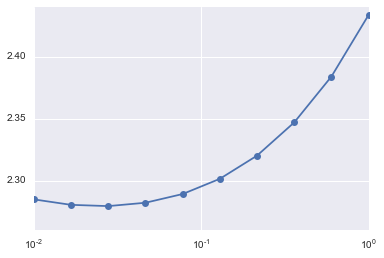

In [149]:
Cs = np.logspace(-2,0,10)
res = []
for C in Cs:
    res.append(score(LogisticRegression(C = C)))
plt.semilogx(Cs, res,'-o');

In [119]:
# In[83]:

score(LogisticRegression(C=0.017))


# In[115]:

score(LogisticRegression(C=0.025, multi_class='multinomial',solver='newton-cg'))


# In[109]:

score(LogisticRegression(C=0.02, multi_class='multinomial',solver='newton-cg'))


# In[113]:

clf = LogisticRegression(C=0.02, multi_class='multinomial',solver='newton-cg')
clf.fit(Xtrain, y)
pred = pd.DataFrame(clf.predict_proba(Xtest), index = gatest.index, columns=targetencoder.classes_)
pred.head()


# In[114]:

pred.to_csv('submit_5.csv',index=True)

In [153]:
score(LogisticRegression(C=0.02, multi_class='multinomial',solver='newton-cg'))

2.2731559680558391

In [10]:
a = pd.DataFrame(events['timestamp'],index = (events['timestamp']))
hour = a.index.hour
weekday = a.index.weekday
events['timeitv'] = hour // np.linspace(3,3,events.shape[0])
timecoder = LabelEncoder().fit(events.timeitv)
#events['timeitv'] = timecoder.transform(events.timeitv)
ntime = len(timecoder.classes_)
time = events[['device_id','timeitv']].groupby(['device_id','timeitv'])['timeitv'].agg(['size']).merge(gatrain[['trainrow']], how='left', left_index=True, right_index=True).merge(gatest[['testrow']], how='left', left_index=True, right_index=True).reset_index()
time.head()

KeyError: "['trainrow'] not in index"

In [4]:
a = pd.DataFrame(events['timestamp'],index = (events['timestamp']))

In [5]:
hour = a.index.hour

In [9]:
weakday = a.index.weekday

In [14]:
# coding: utf-8

# In[1]:

import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from keras.optimizers import SGD

from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.cross_validation import train_test_split
from sklearn.metrics import log_loss

import os
from scipy.sparse import csr_matrix, hstack


# In[2]:

seed = 7
np.random.seed(seed)

# load dataset
#dataframe = pandas.read_csv("/home/username/projects/PracticeNN/iris.data", header=None)

datadir = '/Users/Derick/Desktop/talkingdata'
#datadir = '/home/username/projects/talkingData/input'
gatrain = pd.read_csv(os.path.join(datadir,'gender_age_train.csv'), index_col='device_id')
gatest = pd.read_csv(os.path.join(datadir,'gender_age_test.csv'), index_col = 'device_id')
phone = pd.read_csv(os.path.join(datadir,'phone_brand_device_model.csv'))
# Get rid of duplicate device ids in phone
phone = phone.drop_duplicates('device_id',keep='first').set_index('device_id')
events = pd.read_csv(os.path.join(datadir,'events.csv'),  parse_dates=['timestamp'], index_col='event_id')
appevents = pd.read_csv(os.path.join(datadir,'app_events.csv'), usecols=['event_id','app_id','is_active'], dtype={'is_active':bool})
applabels = pd.read_csv(os.path.join(datadir,'app_labels.csv'))


# In[3]:

gatrain['trainrow'] = np.arange(gatrain.shape[0])
gatest['testrow'] = np.arange(gatest.shape[0])
brandencoder = LabelEncoder().fit(phone.phone_brand)
phone['brand'] = brandencoder.transform(phone['phone_brand'])
gatrain['brand'] = phone['brand']
gatest['brand'] = phone['brand']
Xtr_brand = csr_matrix((np.ones(gatrain.shape[0]),
                       (gatrain.trainrow, gatrain.brand)))
Xte_brand = csr_matrix((np.ones(gatest.shape[0]),
                       (gatest.testrow, gatest.brand)))
print('Brand features: train shape {}, test shape {}'.format(Xtr_brand.shape, Xte_brand.shape))


# In[4]:

m = phone.phone_brand.str.cat(phone.device_model)

modelencoder = LabelEncoder().fit(m)
phone['model'] = modelencoder.transform(m)
gatrain['model'] = phone['model']
gatest['model'] = phone['model']
Xtr_model = csr_matrix((np.ones(gatrain.shape[0]),
                       (gatrain.trainrow, gatrain.model)))
Xte_model = csr_matrix((np.ones(gatest.shape[0]),
                       (gatest.testrow, gatest.model)))
print('Model features: train shape {}, test shape {}'.format(Xtr_model.shape, Xte_model.shape))


# In[5]:

appencoder = LabelEncoder().fit(appevents.app_id)
appevents['app'] = appencoder.transform(appevents.app_id)
napps = len(appencoder.classes_)
deviceapps = (appevents.merge(events[['device_id']], how='left',left_on='event_id',right_index=True)
                       .groupby(['device_id','app'])['app'].agg(['size'])
                       .merge(gatrain[['trainrow']], how='left', left_index=True, right_index=True)
                       .merge(gatest[['testrow']], how='left', left_index=True, right_index=True)
                       .reset_index())
deviceapps.head()

d = deviceapps.dropna(subset=['trainrow'])
Xtr_app = csr_matrix((np.ones(d.shape[0]), (d.trainrow, d.app)),
                      shape=(gatrain.shape[0],napps))
d = deviceapps.dropna(subset=['testrow'])
Xte_app = csr_matrix((np.ones(d.shape[0]), (d.testrow, d.app)),
                      shape=(gatest.shape[0],napps))
print('Apps data: train shape {}, test shape {}'.format(Xtr_app.shape, Xte_app.shape))


# In[6]:

applabels = applabels.loc[applabels.app_id.isin(appevents.app_id.unique())]
applabels['app'] = appencoder.transform(applabels.app_id)
labelencoder = LabelEncoder().fit(applabels.label_id)
applabels['label'] = labelencoder.transform(applabels.label_id)
nlabels = len(labelencoder.classes_)

devicelabels = (deviceapps[['device_id','app']]
                .merge(applabels[['app','label']])
                .groupby(['device_id','label'])['app'].agg(['size'])
                .merge(gatrain[['trainrow']], how='left', left_index=True, right_index=True)
                .merge(gatest[['testrow']], how='left', left_index=True, right_index=True)
                .reset_index())
devicelabels.head()

d = devicelabels.dropna(subset=['trainrow'])
Xtr_label = csr_matrix((np.ones(d.shape[0]), (d.trainrow, d.label)),
                      shape=(gatrain.shape[0],nlabels))
d = devicelabels.dropna(subset=['testrow'])
Xte_label = csr_matrix((np.ones(d.shape[0]), (d.testrow, d.label)),
                      shape=(gatest.shape[0],nlabels))
print('Labels data: train shape {}, test shape {}'.format(Xtr_label.shape, Xte_label.shape))


# In[14]:

# active_time
a = pd.DataFrame(events['timestamp'],index = (events['timestamp']))
hour = a.index.hour
weekday = a.index.weekday
events['timeitv'] = (weekday // np.linspace(7,7,events.shape[0])) * 7 + (hour // np.linspace(3,3,events.shape[0]))
timecoder = LabelEncoder().fit(events.timeitv)
#events['timeitv'] = timecoder.transform(events.timeitv)
ntime = len(timecoder.classes_)
time = events[['device_id','timeitv']].groupby(['device_id','timeitv'])['timeitv'].agg(['size']).merge(gatrain[['trainrow']], how='left', left_index=True, right_index=True).merge(gatest[['testrow']], how='left', left_index=True, right_index=True).reset_index()
time.head()

d = time.dropna(subset=['trainrow'])
Xtr_time = csr_matrix((np.ones(d.shape[0]), (d.trainrow, d.timeitv)), 
                      shape=(gatrain.shape[0],ntime))
d = time.dropna(subset=['testrow'])
Xte_time = csr_matrix((np.ones(d.shape[0]) , (d.testrow, d.timeitv)), 
                      shape=(gatest.shape[0],ntime))
print('time data: train shape {}, test shape {}'.format(Xtr_time.shape, Xte_time.shape))


# In[15]:

zipcode=pd.read_csv('/Users/Derick/Desktop/talkingdata/zipcode.csv')
nzips=531
d = zipcode.dropna(subset=['trainrow'])
Xtr_location = csr_matrix((np.ones(d.shape[0]), (d.trainrow, d['zip'])), 
                      shape=(gatrain.shape[0],nzips))
d = zipcode.dropna(subset=['testrow'])
Xte_location = csr_matrix((np.ones(d.shape[0]) , (d.testrow, d['zip'])), 
                      shape=(gatest.shape[0],nzips))
print('location data: train shape {}, test shape {}'.format(Xtr_location.shape, Xte_location.shape))


# In[16]:

Xtrain = hstack((Xtr_brand, Xtr_model, Xtr_app, Xtr_label, Xtr_time, Xtr_location), format='csr')
Xtest =  hstack((Xte_brand, Xte_model, Xte_app, Xte_label, Xte_time, Xte_location), format='csr')
print('All features: train shape {}, test shape {}'.format(Xtrain.shape, Xtest.shape))


# In[17]:

targetencoder = LabelEncoder().fit(gatrain.group)
y = targetencoder.transform(gatrain.group)
nclasses = len(targetencoder.classes_)
dummy_y = np_utils.to_categorical(y) ## Funcion de Keras!


# In[18]:

def batch_generator(X, y, batch_size, shuffle):
    #chenglong code for fiting from generator (https://www.kaggle.com/c/talkingdata-mobile-user-demographics/forums/t/22567/neural-network-for-sparse-matrices)
    number_of_batches = np.ceil(X.shape[0]/batch_size)
    counter = 0
    sample_index = np.arange(X.shape[0])
    if shuffle:
        np.random.shuffle(sample_index)
    while True:
        batch_index = sample_index[batch_size*counter:batch_size*(counter+1)]
        X_batch = X[batch_index,:].toarray()
        y_batch = y[batch_index]
        counter += 1
        yield X_batch, y_batch
        if (counter == number_of_batches):
            if shuffle:
                np.random.shuffle(sample_index)
            counter = 0


# In[28]:

def batch_generatorp(X, batch_size, shuffle):
    number_of_batches =X.shape[0] /  np.ceil(X.shape[0]/batch_size)
    counter = 0
    sample_index = np.arange(X.shape[0])
    while True:
        batch_index = sample_index[batch_size * counter:batch_size * (counter + 1)]
        X_batch = X[batch_index, :].toarray()
        counter += 1
        yield X_batch
        if (counter == number_of_batches):
            counter = 0


# In[36]:

from keras.layers.advanced_activations import PReLU
# build model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(150, input_dim=Xtrain.shape[1], init='normal'))
    model.add(PReLU())
    model.add(Dropout(0.4))
    model.add(Dense(50, input_dim=Xtrain.shape[1], init='normal'))
    model.add(PReLU())
    model.add(Dropout(0.2))
    model.add(Dense(12, init='normal', activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adadelta', metrics=['accuracy'])  #logloss
    return model

model=baseline_model()
X_train, X_val, y_train, y_val = train_test_split(Xtrain, dummy_y, test_size=0.002, random_state=42)
fit= model.fit_generator(generator=batch_generator(X_train, y_train, 400, True),
                         nb_epoch=15,
                         samples_per_epoch=69984,
                         validation_data=(X_val.todense(), y_val), verbose=2
                         )


# In[29]:




# In[38]:

# evaluate the model
scores_val = model.predict_generator(generator=batch_generatorp(X_val, 400, False), val_samples=X_val.shape[0])
print('logloss val {}'.format(log_loss(y_val, scores_val)))

print("# Final prediction")
scores = model.predict_generator(generator=batch_generatorp(Xtest, 800, False), val_samples=Xtest.shape[0])
pred = pd.DataFrame(scores, index = gatest.index, columns=targetencoder.classes_)
pred.to_csv('submit16.csv',index=True)






Brand features: train shape (74645, 131), test shape (112071, 131)
Model features: train shape (74645, 1667), test shape (112071, 1667)
Apps data: train shape (74645, 19237), test shape (112071, 19237)
Labels data: train shape (74645, 492), test shape (112071, 492)
time data: train shape (74645, 8), test shape (112071, 8)
location data: train shape (74645, 531), test shape (112071, 531)
All features: train shape (74645, 22066), test shape (112071, 22066)
Epoch 1/15


/Users/Derick/anaconda/lib/python3.5/site-packages/keras/engine/training.py:1463: UserWarning: Epoch comprised more than `samples_per_epoch` samples, which might affect learning results. Set `samples_per_epoch` correctly to avoid this warning.
  warnings.warn('Epoch comprised more than '


22s - loss: 2.4268 - acc: 0.1327 - val_loss: 2.3891 - val_acc: 0.1600
Epoch 2/15
22s - loss: 2.3567 - acc: 0.1634 - val_loss: 2.3420 - val_acc: 0.1600
Epoch 3/15
23s - loss: 2.3178 - acc: 0.1762 - val_loss: 2.3296 - val_acc: 0.1533
Epoch 4/15
21s - loss: 2.2971 - acc: 0.1845 - val_loss: 2.3155 - val_acc: 0.1600
Epoch 5/15
23s - loss: 2.2843 - acc: 0.1887 - val_loss: 2.3093 - val_acc: 0.1600
Epoch 6/15
27s - loss: 2.2773 - acc: 0.1922 - val_loss: 2.2989 - val_acc: 0.1800
Epoch 7/15
27s - loss: 2.2633 - acc: 0.1977 - val_loss: 2.2910 - val_acc: 0.1733
Epoch 8/15
29s - loss: 2.2567 - acc: 0.2026 - val_loss: 2.2817 - val_acc: 0.1733
Epoch 9/15
24s - loss: 2.2468 - acc: 0.2036 - val_loss: 2.2772 - val_acc: 0.1600
Epoch 10/15
21s - loss: 2.2409 - acc: 0.2053 - val_loss: 2.2710 - val_acc: 0.1733
Epoch 11/15
21s - loss: 2.2383 - acc: 0.2064 - val_loss: 2.2696 - val_acc: 0.1933
Epoch 12/15
21s - loss: 2.2275 - acc: 0.2112 - val_loss: 2.2594 - val_acc: 0.1733
Epoch 13/15
21s - loss: 2.2221 - acc

In [2]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from keras.optimizers import SGD

from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.cross_validation import train_test_split
from sklearn.metrics import log_loss

import os
from scipy.sparse import csr_matrix, hstack

Using Theano backend.


In [4]:
a = pd.DataFrame(events['timestamp'],index = (events['timestamp']))
hour = a.index.hour
weekday = a.index.weekday
events['timeitv'] = weekday * 8 + (hour // np.linspace(3,3,events.shape[0]))

In [12]:
events['timeitv']

event_id
1          48.0
2          48.0
3          48.0
4          48.0
5          48.0
6          48.0
7          48.0
8          48.0
9          48.0
10         48.0
11         48.0
12         48.0
13         48.0
14         48.0
15         48.0
16         48.0
17         48.0
18         48.0
19         48.0
20         48.0
21         48.0
22         48.0
23         47.0
24         47.0
25         47.0
26         48.0
27         48.0
28         48.0
29         48.0
30         48.0
           ... 
3252921    47.0
3252922    47.0
3252923    47.0
3252924    47.0
3252925    47.0
3252926    47.0
3252927    47.0
3252928    47.0
3252929    47.0
3252930    47.0
3252931    47.0
3252932    47.0
3252933    47.0
3252934    47.0
3252935    47.0
3252936    47.0
3252937    47.0
3252938    47.0
3252939    47.0
3252940    47.0
3252941    47.0
3252942    47.0
3252943    47.0
3252944    47.0
3252945    47.0
3252946    47.0
3252947    47.0
3252948    47.0
3252949    47.0
3252950    47.0
Name: timeitv, 

In [13]:



# In[1]:

import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from keras.optimizers import SGD

from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.cross_validation import train_test_split
from sklearn.metrics import log_loss

import os
from scipy.sparse import csr_matrix, hstack


# In[2]:

seed = 7
np.random.seed(seed)

# load dataset
#dataframe = pandas.read_csv("/home/username/projects/PracticeNN/iris.data", header=None)

datadir = '/Users/Derick/Desktop/talkingdata'
#datadir = '/home/username/projects/talkingData/input'
gatrain = pd.read_csv(os.path.join(datadir,'gender_age_train.csv'), index_col='device_id')
gatest = pd.read_csv(os.path.join(datadir,'gender_age_test.csv'), index_col = 'device_id')
phone = pd.read_csv(os.path.join(datadir,'phone_brand_device_model.csv'))
# Get rid of duplicate device ids in phone
phone = phone.drop_duplicates('device_id',keep='first').set_index('device_id')
events = pd.read_csv(os.path.join(datadir,'events.csv'),  parse_dates=['timestamp'], index_col='event_id')
appevents = pd.read_csv(os.path.join(datadir,'app_events.csv'), usecols=['event_id','app_id','is_active'], dtype={'is_active':bool})
applabels = pd.read_csv(os.path.join(datadir,'app_labels.csv'))


# In[3]:

gatrain['trainrow'] = np.arange(gatrain.shape[0])
gatest['testrow'] = np.arange(gatest.shape[0])
brandencoder = LabelEncoder().fit(phone.phone_brand)
phone['brand'] = brandencoder.transform(phone['phone_brand'])
gatrain['brand'] = phone['brand']
gatest['brand'] = phone['brand']
Xtr_brand = csr_matrix((np.ones(gatrain.shape[0]),
                       (gatrain.trainrow, gatrain.brand)))
Xte_brand = csr_matrix((np.ones(gatest.shape[0]),
                       (gatest.testrow, gatest.brand)))
print('Brand features: train shape {}, test shape {}'.format(Xtr_brand.shape, Xte_brand.shape))


# In[4]:

m = phone.phone_brand.str.cat(phone.device_model)

modelencoder = LabelEncoder().fit(m)
phone['model'] = modelencoder.transform(m)
gatrain['model'] = phone['model']
gatest['model'] = phone['model']
Xtr_model = csr_matrix((np.ones(gatrain.shape[0]),
                       (gatrain.trainrow, gatrain.model)))
Xte_model = csr_matrix((np.ones(gatest.shape[0]),
                       (gatest.testrow, gatest.model)))
print('Model features: train shape {}, test shape {}'.format(Xtr_model.shape, Xte_model.shape))


# In[5]:

appencoder = LabelEncoder().fit(appevents.app_id)
appevents['app'] = appencoder.transform(appevents.app_id)
napps = len(appencoder.classes_)
deviceapps = (appevents.merge(events[['device_id']], how='left',left_on='event_id',right_index=True)
                       .groupby(['device_id','app'])['app'].agg(['size'])
                       .merge(gatrain[['trainrow']], how='left', left_index=True, right_index=True)
                       .merge(gatest[['testrow']], how='left', left_index=True, right_index=True)
                       .reset_index())
deviceapps.head()

d = deviceapps.dropna(subset=['trainrow'])
Xtr_app = csr_matrix((np.ones(d.shape[0]), (d.trainrow, d.app)),
                      shape=(gatrain.shape[0],napps))
d = deviceapps.dropna(subset=['testrow'])
Xte_app = csr_matrix((np.ones(d.shape[0]), (d.testrow, d.app)),
                      shape=(gatest.shape[0],napps))
print('Apps data: train shape {}, test shape {}'.format(Xtr_app.shape, Xte_app.shape))


# In[6]:

applabels = applabels.loc[applabels.app_id.isin(appevents.app_id.unique())]
applabels['app'] = appencoder.transform(applabels.app_id)
labelencoder = LabelEncoder().fit(applabels.label_id)
applabels['label'] = labelencoder.transform(applabels.label_id)
nlabels = len(labelencoder.classes_)

devicelabels = (deviceapps[['device_id','app']]
                .merge(applabels[['app','label']])
                .groupby(['device_id','label'])['app'].agg(['size'])
                .merge(gatrain[['trainrow']], how='left', left_index=True, right_index=True)
                .merge(gatest[['testrow']], how='left', left_index=True, right_index=True)
                .reset_index())
devicelabels.head()

d = devicelabels.dropna(subset=['trainrow'])
Xtr_label = csr_matrix((np.ones(d.shape[0]), (d.trainrow, d.label)),
                      shape=(gatrain.shape[0],nlabels))
d = devicelabels.dropna(subset=['testrow'])
Xte_label = csr_matrix((np.ones(d.shape[0]), (d.testrow, d.label)),
                      shape=(gatest.shape[0],nlabels))
print('Labels data: train shape {}, test shape {}'.format(Xtr_label.shape, Xte_label.shape))


# In[14]:

# active_time
a = pd.DataFrame(events['timestamp'],index = (events['timestamp']))
hour = a.index.hour
weekday = a.index.weekday
events['timeitv'] = weekday * 8 + (hour // np.linspace(3,3,events.shape[0]))
timecoder = LabelEncoder().fit(events.timeitv)
#events['timeitv'] = timecoder.transform(events.timeitv)
ntime = len(timecoder.classes_)
time = events[['device_id','timeitv']].groupby(['device_id','timeitv'])['timeitv'].agg(['size']).merge(gatrain[['trainrow']], how='left', left_index=True, right_index=True).merge(gatest[['testrow']], how='left', left_index=True, right_index=True).reset_index()
time.head()

d = time.dropna(subset=['trainrow'])
Xtr_time = csr_matrix((np.ones(d.shape[0]), (d.trainrow, d.timeitv)), 
                      shape=(gatrain.shape[0],ntime))
d = time.dropna(subset=['testrow'])
Xte_time = csr_matrix((np.ones(d.shape[0]) , (d.testrow, d.timeitv)), 
                      shape=(gatest.shape[0],ntime))
print('time data: train shape {}, test shape {}'.format(Xtr_time.shape, Xte_time.shape))


# In[15]:

zipcode=pd.read_csv('/Users/Derick/Desktop/talkingdata/zipcode.csv')
nzips=531
d = zipcode.dropna(subset=['trainrow'])
Xtr_location = csr_matrix((np.ones(d.shape[0]), (d.trainrow, d['zip'])), 
                      shape=(gatrain.shape[0],nzips))
d = zipcode.dropna(subset=['testrow'])
Xte_location = csr_matrix((np.ones(d.shape[0]) , (d.testrow, d['zip'])), 
                      shape=(gatest.shape[0],nzips))
print('location data: train shape {}, test shape {}'.format(Xtr_location.shape, Xte_location.shape))


# In[16]:

Xtrain = hstack((Xtr_brand, Xtr_model, Xtr_app, Xtr_label, Xtr_time, Xtr_location), format='csr')
Xtest =  hstack((Xte_brand, Xte_model, Xte_app, Xte_label, Xte_time, Xte_location), format='csr')
print('All features: train shape {}, test shape {}'.format(Xtrain.shape, Xtest.shape))


# In[17]:

targetencoder = LabelEncoder().fit(gatrain.group)
y = targetencoder.transform(gatrain.group)
nclasses = len(targetencoder.classes_)
dummy_y = np_utils.to_categorical(y) ## Funcion de Keras!


# In[18]:

def batch_generator(X, y, batch_size, shuffle):
    #chenglong code for fiting from generator (https://www.kaggle.com/c/talkingdata-mobile-user-demographics/forums/t/22567/neural-network-for-sparse-matrices)
    number_of_batches = np.ceil(X.shape[0]/batch_size)
    counter = 0
    sample_index = np.arange(X.shape[0])
    if shuffle:
        np.random.shuffle(sample_index)
    while True:
        batch_index = sample_index[batch_size*counter:batch_size*(counter+1)]
        X_batch = X[batch_index,:].toarray()
        y_batch = y[batch_index]
        counter += 1
        yield X_batch, y_batch
        if (counter == number_of_batches):
            if shuffle:
                np.random.shuffle(sample_index)
            counter = 0


# In[28]:

def batch_generatorp(X, batch_size, shuffle):
    number_of_batches =X.shape[0] /  np.ceil(X.shape[0]/batch_size)
    counter = 0
    sample_index = np.arange(X.shape[0])
    while True:
        batch_index = sample_index[batch_size * counter:batch_size * (counter + 1)]
        X_batch = X[batch_index, :].toarray()
        counter += 1
        yield X_batch
        if (counter == number_of_batches):
            counter = 0


# In[36]:

from keras.layers.advanced_activations import PReLU
# build model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(150, input_dim=Xtrain.shape[1], init='normal'))
    model.add(PReLU())
    model.add(Dropout(0.4))
    model.add(Dense(50, input_dim=Xtrain.shape[1], init='normal'))
    model.add(PReLU())
    model.add(Dropout(0.2))
    model.add(Dense(12, init='normal', activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adadelta', metrics=['accuracy'])  #logloss
    return model

model=baseline_model()
X_train, X_val, y_train, y_val = train_test_split(Xtrain, dummy_y, test_size=0.002, random_state=42)
fit= model.fit_generator(generator=batch_generator(X_train, y_train, 400, True),
                         nb_epoch=15,
                         samples_per_epoch=69984,
                         validation_data=(X_val.todense(), y_val), verbose=2
                         )


# In[29]:




# In[38]:

# evaluate the model
scores_val = model.predict_generator(generator=batch_generatorp(X_val, 400, False), val_samples=X_val.shape[0])
print('logloss val {}'.format(log_loss(y_val, scores_val)))

print("# Final prediction")
scores = model.predict_generator(generator=batch_generatorp(Xtest, 800, False), val_samples=Xtest.shape[0])
pred = pd.DataFrame(scores, index = gatest.index, columns=targetencoder.classes_)
pred.to_csv('submit18.csv',index=True)






# In[ ]:








Brand features: train shape (74645, 131), test shape (112071, 131)
Model features: train shape (74645, 1667), test shape (112071, 1667)
Apps data: train shape (74645, 19237), test shape (112071, 19237)
Labels data: train shape (74645, 492), test shape (112071, 492)
time data: train shape (74645, 56), test shape (112071, 56)
location data: train shape (74645, 531), test shape (112071, 531)
All features: train shape (74645, 22114), test shape (112071, 22114)
Epoch 1/15


/Users/Derick/anaconda/lib/python3.5/site-packages/keras/engine/training.py:1463: UserWarning: Epoch comprised more than `samples_per_epoch` samples, which might affect learning results. Set `samples_per_epoch` correctly to avoid this warning.
  warnings.warn('Epoch comprised more than '


21s - loss: 2.4300 - acc: 0.1323 - val_loss: 2.3894 - val_acc: 0.1533
Epoch 2/15
21s - loss: 2.3588 - acc: 0.1640 - val_loss: 2.3446 - val_acc: 0.1533
Epoch 3/15
21s - loss: 2.3150 - acc: 0.1767 - val_loss: 2.3202 - val_acc: 0.1467
Epoch 4/15
21s - loss: 2.3000 - acc: 0.1841 - val_loss: 2.3100 - val_acc: 0.1600
Epoch 5/15
20s - loss: 2.2828 - acc: 0.1918 - val_loss: 2.3036 - val_acc: 0.1800
Epoch 6/15
21s - loss: 2.2753 - acc: 0.1947 - val_loss: 2.2891 - val_acc: 0.1533
Epoch 7/15
21s - loss: 2.2642 - acc: 0.1965 - val_loss: 2.2857 - val_acc: 0.1733
Epoch 8/15
22s - loss: 2.2561 - acc: 0.2017 - val_loss: 2.2788 - val_acc: 0.1733
Epoch 9/15
21s - loss: 2.2504 - acc: 0.2037 - val_loss: 2.2715 - val_acc: 0.1600
Epoch 10/15
21s - loss: 2.2383 - acc: 0.2089 - val_loss: 2.2699 - val_acc: 0.1667
Epoch 11/15
21s - loss: 2.2347 - acc: 0.2082 - val_loss: 2.2648 - val_acc: 0.1600
Epoch 12/15
21s - loss: 2.2291 - acc: 0.2117 - val_loss: 2.2688 - val_acc: 0.1600
Epoch 13/15
21s - loss: 2.2203 - acc